In [45]:
import pandas as pd
import sqlite3
import pandasql
import matplotlib.pyplot as plt


conn = sqlite3.connect('im.db')

In [9]:
pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    """, conn
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [15]:
pd.read_sql(
    """
    SELECT *
    FROM movie_ratings
    """, conn
)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [33]:
pd.read_sql(
    """
    SELECT r.movie_id, AVG(r.averagerating) as total_rating, r.numvotes, b.primary_title, b.runtime_minutes, b.genres
    FROM movie_ratings as r
        JOIN movie_basics as b
            USING(movie_id)
    GROUP BY b.genres
    ORDER BY total_rating DESC
    """, conn
)

,movie_id,total_rating,numvotes,primary_title,runtime_minutes,genres
0,tt4135932,9.4,5,Lost Conquest,70.0,"Comedy,Documentary,Fantasy"
1,tt3856476,9.3,19,Sunakali,59.0,"Documentary,Family,Musical"
2,tt5903964,9.2,5,The Long Count Teaser,NaN,"History,Sport"
3,tt1954785,9.0,5,Rock N Roll Over,NaN,"Music,Mystery"
4,tt2896176,9.0,7,Wait Wait Don't Tell Me Live!,130.0,Game-Show
...,...,...,...,...,...,...
919,tt8463476,2.4,88,Killed by Rock and Roll,94.0,"Crime,Music"
920,tt4656810,2.3,227,The Broken Key,120.0,"History,Sci-Fi,Thriller"
921,tt3140634,2.3,9,Ladies Mafia,86.0,"Adventure,Crime,Romance"
922,tt3718824,2.0,128,The Hospital 2,120.0,"Adult,Horror"


In [37]:
pd.read_sql(
    """
    SELECT r.movie_id, r.averagerating, r.numvotes, b.primary_title, b.runtime_minutes, b.genres
    FROM movie_ratings as r
        JOIN movie_basics as b
            USING(movie_id)
    WHERE b.genres LIKE '%Documentary%'
    GROUP BY b.genres
    ORDER BY r.averagerating DESC
    """, conn
)

,movie_id,averagerating,numvotes,primary_title,runtime_minutes,genres
0,tt1740810,9.7,25,Love on a Leash,10.0,"Documentary,Family,Romance"
1,tt10146728,9.7,22,Foosballers,NaN,"Comedy,Documentary,Sport"
2,tt4135932,9.4,5,Lost Conquest,70.0,"Comedy,Documentary,Fantasy"
3,tt3856476,9.3,19,Sunakali,59.0,"Documentary,Family,Musical"
4,tt10156610,9.2,29,Ratne Price Sa Kosara,107.0,"Documentary,History,War"
...,...,...,...,...,...,...
168,tt1563778,4.8,171,The Adonis Factor,69.0,"Documentary,Reality-TV"
169,tt1992222,4.6,26,Soul Catcher,80.0,"Documentary,Horror,Thriller"
170,tt4222512,4.3,7,Beyond Evil: The Dead of Night,90.0,"Documentary,Horror,Mystery"
171,tt7128608,3.6,10,Gay Hollywood Dad,95.0,"Biography,Documentary,Reality-TV"


In [39]:
pd.read_sql(
    """
    SELECT r.movie_id, AVG(r.averagerating) as rating, r.numvotes, b.primary_title, b.runtime_minutes, b.genres
    FROM movie_ratings as r
        JOIN movie_basics as b
            USING(movie_id)
    WHERE b.genres LIKE '%Documentary%'
    ORDER BY rating DESC
    """, conn
)

,movie_id,rating,numvotes,primary_title,runtime_minutes,genres
0,tt0159369,7.33209,53,Cooper and Hemingway: The True Gen,180.0,Documentary


In [44]:
pd.read_sql(
    """
    SELECT *
    FROM movie_ratings as r
        JOIN movie_akas
            USING(movie_id)
    WHERE numvotes > 20000
    ORDER BY averagerating DESC
    """, conn
)

,movie_id,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt5813916,9.3,100568,1,Montagna II,IT,None,None,new title,0.0
1,tt5813916,9.3,100568,2,Гора 2,RU,None,None,None,0.0
2,tt5813916,9.3,100568,3,Montanha II,PT,None,None,new title,0.0
3,tt5813916,9.3,100568,4,Dag II,None,None,original,None,1.0
4,tt5813916,9.3,100568,5,Montagne II,FR,None,None,new title,0.0
...,...,...,...,...,...,...,...,...,...,...
47366,tt4458206,1.5,26723,4,Код доступа,RU,None,None,None,0.0
47367,tt4458206,1.5,26723,5,Kod Adi K.O.Z.,TR,None,None,None,0.0
47368,tt7221896,1.3,36986,1,Cumali Ceber: Allah Seni Alsin,None,None,original,None,1.0
47369,tt7221896,1.3,36986,2,Cumali Ceber: Allah Seni Alsin,TR,None,None,None,0.0


In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_ratings as r
        JOIN movie_akas
            USING(movie_id)
    ORDER BY averagerating DESC
    """, conn
)

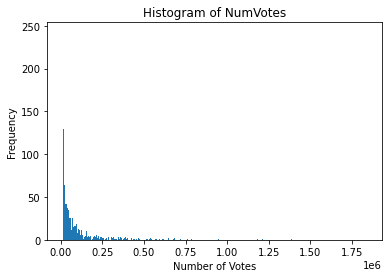

In [51]:
sql_query = "SELECT numvotes FROM movie_ratings WHERE numvotes > 10000;"
df = pd.read_sql(sql_query, conn)

plt.hist(df['numvotes'], bins=1000)  # You can adjust the number of bins as needed
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of NumVotes')
plt.show()